# Climate in 2025 — Kobe, Japan (Visualization)
### Final project of Fundamentals of Visualization

This Jupyter Notebook visualizes weather data from Kobe, Japan, using the Japan Meteorological Agency dataset and the Python Seaborn library to examine whether 2025 was unusually hot.

### Graph Types and Their Features

| Name | Graph Type | Purpose | Details | Features | Challenges |
|------|------------|---------|---------|----------|------------|
| Monthly Average of Max and Min Temperatures (Line Chart) | Line chart | Long-term trend | Monthly averages of max and min temperatures from Jan 2011 to Dec 2025 | Shows long-term climate changes | Hard to detect differences unless there are major shifts |
| Monthly Average of Max and Min Temperatures (Heatmap) | Heat map | Long-term trend | Monthly averages of max and min temperatures from Jan 2011 to Dec 2025 | Easy to compare temperatures across years by placing months as rows and years as columns | May overlook differences due to high information density |
| Monthly Distribution Comparison of Max Temperatures | Box plot | Distribution comparison | Boxplots comparing 2025 max temperatures with previous years for each month | Clearly shows differences in mean, quartiles, and outliers | Hard to grasp the density of temperature distribution within the same month |
| 7-Day Moving Average of Max and Min Temperatures | Line chart | Short-term trend | 7-day moving averages from Jan 1 to Dec 31 for 2025 and previous years | Smooths daily fluctuations and highlights periods with significant deviations | Past data is averaged, making it hard to judge if similar patterns occurred in other years |
| Number of Days with Max ≥ 35°C and Min ≥ 25°C | Box plot + markers | Detecting anomalies | Monthly distribution of days with max ≥ 35°C and min ≥ 25°C (2011–2025), with 2025 values overlaid as diamond markers | Clearly shows whether 2025 had more extremely hot days than other years | Focuses only on summer heat; cannot assess warm winter days or cooler summer days |

### 1. Import required libraries

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import datetime
import seaborn as sns
import pandas as pd

### 2. Read the raw data from the CSV file and format it

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('csv/kobe.csv', encoding='cp932', header=3)

# Rename columns
df.columns = ['Date', 'Max Temp', 'Min Temp']
# date column to datetime type from Japanese format
df['Date'] = pd.to_datetime(df['Date'], format='%Y年%m月%d日')
# Convert temperature columns to numeric
df['Max Temp'] = pd.to_numeric(df['Max Temp'], errors='coerce')
df['Min Temp'] = pd.to_numeric(df['Min Temp'], errors='coerce')

In [7]:
# Add Year and Month columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
# Add yearmonth column
df['YearMonth'] = df['Date'].dt.to_period('M')
# Add df categorical column year is 2025 and others
df['2025'] = df['Year'].apply(lambda x: True if x == 2025 else False)

In [8]:
df.head()

,Date,Max Temp,Min Temp,Year,Month,YearMonth,2025
0,2011-01-01,6.5,1.3,2011,1,2011-01,False
1,2011-01-02,10.3,3.3,2011,1,2011-01,False
2,2011-01-03,8.6,1.3,2011,1,2011-01,False
3,2011-01-04,10.3,3.7,2011,1,2011-01,False
4,2011-01-05,8.7,3.0,2011,1,2011-01,False


### 3. Visualization 1 – Line chart of monthly average maximum and minimum temperatures

In [9]:
# Mean Max Temp and Min Temp by Month
monthly_avg = df.groupby('YearMonth')[['Max Temp', 'Min Temp']].mean().reset_index()
monthly_avg.head()

,YearMonth,Max Temp,Min Temp
0,2011-01,7.780645,1.135484
1,2011-02,11.096296,4.017857
2,2011-03,12.006452,4.445161
3,2011-04,17.756667,9.690000
4,2011-05,22.633333,16.577419


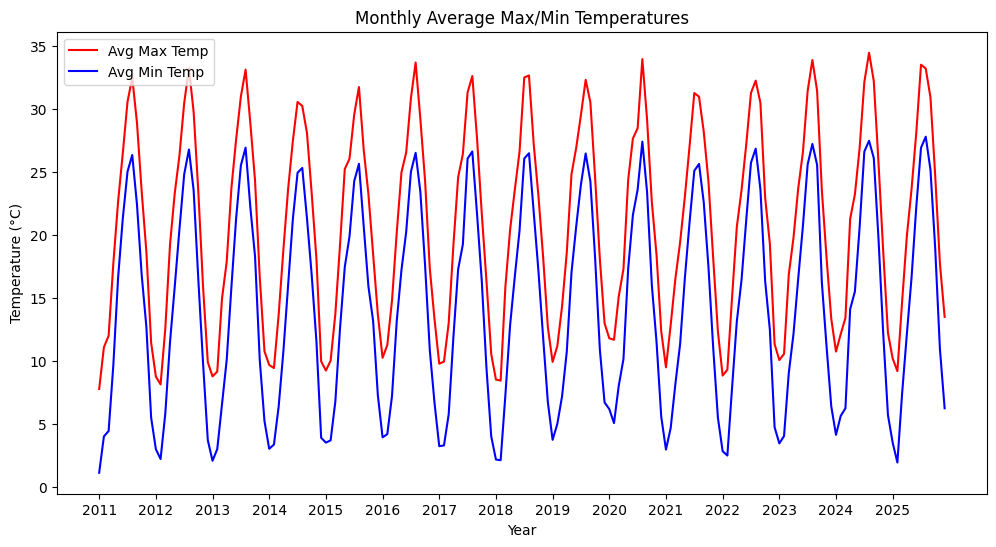

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['YearMonth'].astype(str), monthly_avg['Max Temp'], label='Avg Max Temp', color='r')
plt.plot(monthly_avg['YearMonth'].astype(str), monthly_avg['Min Temp'], label='Avg Min Temp', color='b')
plt.title('Monthly Average Max/Min Temperatures')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')

# Get unique years from YearMonth
years = sorted(set(str(ym)[:4] for ym in monthly_avg['YearMonth']))
# Find the first index of each year in YearMonth
year_indices = [monthly_avg[monthly_avg['YearMonth'].astype(str).str.startswith(year)].index[0] for year in years]

plt.xticks(ticks=year_indices, labels=years, rotation=0)
plt.legend()
plt.show();

### 4. Visualization 2 – Monthly Average of Max and Min Temperatures (Heatmap)

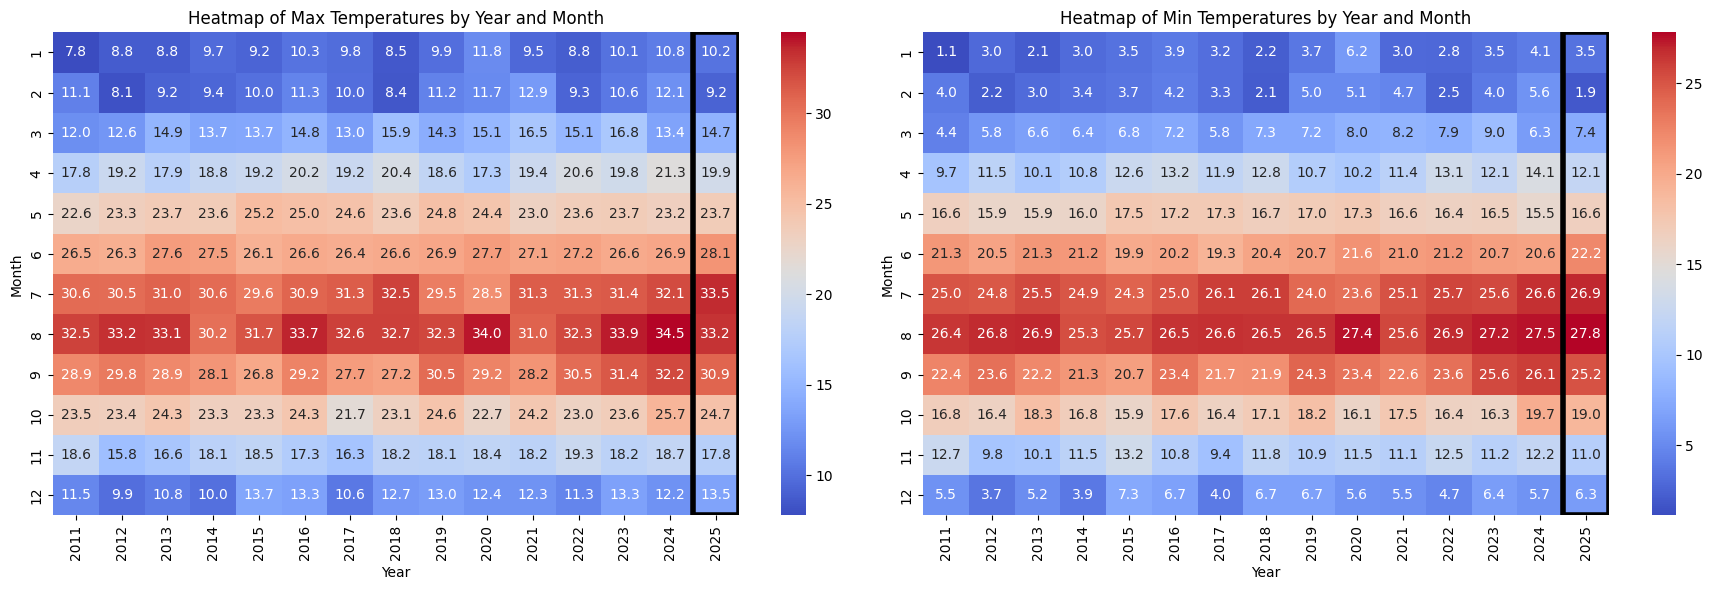

In [18]:
# Heatmap of Max Temp by Year and Month
pivot_max = df.pivot_table(values='Max Temp', index='Month', columns='Year', aggfunc='mean')
pivot_min = df.pivot_table(values='Min Temp', index='Month', columns='Year', aggfunc='mean')

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(pivot_max, cmap='coolwarm', annot=True, fmt=".1f", ax=axes[0])
axes[0].set_title('Heatmap of Max Temperatures by Year and Month')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Month')

# Highlight the year 2025 column
if 2025 in pivot_max.columns:
    col_idx = list(pivot_max.columns).index(2025)
    axes[0].add_patch(plt.Rectangle((col_idx, 0), 1, len(pivot_max.index), fill=False, edgecolor='black', linewidth=4))

sns.heatmap(pivot_min, cmap='coolwarm', annot=True, fmt=".1f", ax=axes[1])
axes[1].set_title('Heatmap of Min Temperatures by Year and Month')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Month')

if 2025 in pivot_min.columns:
    col_idx = list(pivot_min.columns).index(2025)
    axes[1].add_patch(plt.Rectangle((col_idx, 0), 1, len(pivot_min.index), fill=False, edgecolor='black', linewidth=4))

plt.tight_layout()
plt.show();


### 5. Visualization 3 – Monthly Distribution Comparison of Max Temperatures

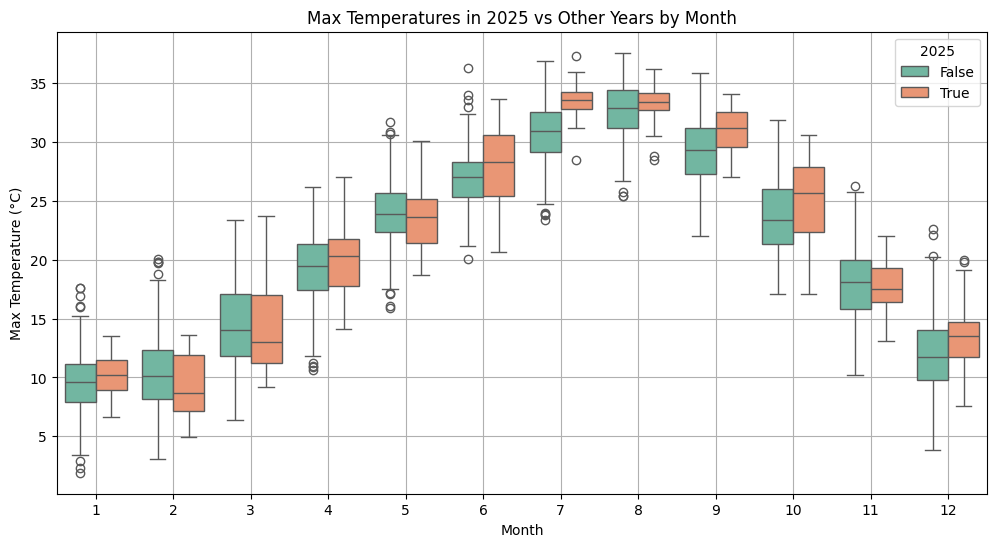

In [12]:
# Box plot of Max Temp for 2025 vs Other Years by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Max Temp', hue='2025', data=df, palette='Set2')
plt.title('Max Temperatures in 2025 vs Other Years by Month')
plt.ylabel('Max Temperature (°C)')
plt.grid()
plt.show();

### 6. Visualization 4 – 7-Day Moving Average of Max and Min Temperatures

In [ ]:
# 7-day Moving Average for 2025 vs Other Years
# 2025
df_2025 = df[df['Year'] == 2025].copy()
# Other Years
df_other = df[df['Year'] != 2025].copy()

# 7-day moving average for 2025
df_2025['DayOfYear'] = df_2025['Date'].dt.dayofyear
df_2025['Max Temp 7-day MA'] = df_2025['Max Temp'].rolling(window=7).mean()
df_2025['Min Temp 7-day MA'] = df_2025['Min Temp'].rolling(window=7).mean()

# 7-day moving average for Other Years
df_other['DayOfYear'] = df_other['Date'].dt.dayofyear
other_max_ma = df_other.groupby('DayOfYear')['Max Temp'].mean().rolling(window=7).mean()
other_min_ma = df_other.groupby('DayOfYear')['Min Temp'].mean().rolling(window=7).mean()

# Convert day of year to date string (e.g., '01-Mar')
def day_to_date(x, pos):
    try:
        date = datetime.datetime(2025, 1, 1) + datetime.timedelta(days=int(x)-1)
        return date.strftime('%d-%b')
    except:
        return ''

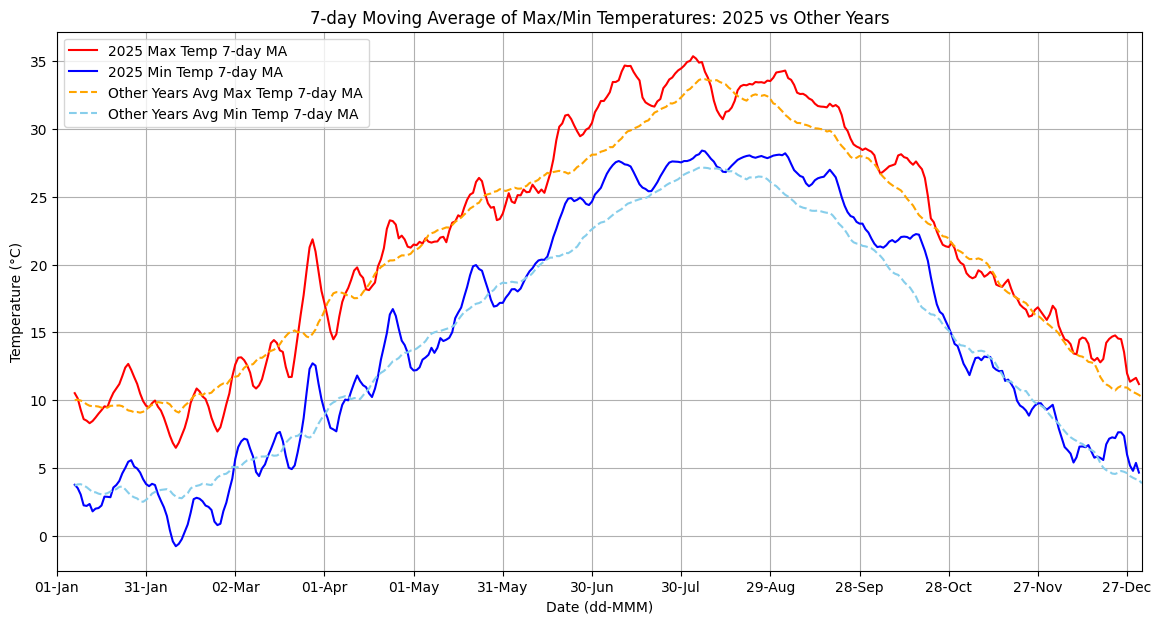

In [20]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df_2025['DayOfYear'], df_2025['Max Temp 7-day MA'], label='2025 Max Temp 7-day MA', color='red')
plt.plot(df_2025['DayOfYear'], df_2025['Min Temp 7-day MA'], label='2025 Min Temp 7-day MA', color='blue')
plt.plot(other_max_ma.index, other_max_ma.values, label='Other Years Avg Max Temp 7-day MA', color='orange', linestyle='--')
plt.plot(other_min_ma.index, other_min_ma.values, label='Other Years Avg Min Temp 7-day MA', color='skyblue', linestyle='--')
plt.title('7-day Moving Average of Max/Min Temperatures: 2025 vs Other Years')
# Set x-axis labels to English date format (e.g., '01-Mar')

plt.xlabel('Date (dd-MMM)')
plt.gca().xaxis.set_major_formatter(FuncFormatter(day_to_date))
plt.xticks(ticks=range(1, 367, 30))  # Show every ~month
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.xlim(1, 366)
plt.show();

### 7. Visualization 5 – Number of Days with Max ≥ 35°C and Min ≥ 25°C

In [21]:
# Count of Extreme Temperature Days by Month
heatwave_days = df[df['Max Temp'] > 35].groupby('YearMonth').size().reset_index(name='Heatwave Days (>35°C)')
hot_days = df[df['Min Temp'] > 25].groupby('YearMonth').size().reset_index(name='Hot Days (>25°C)')

# concat heatwave_days and hot_days
extreme_days = pd.merge(heatwave_days, hot_days, on='YearMonth', how='outer').fillna(0)
extreme_days['YearMonth'] = extreme_days['YearMonth'].astype(str)

# Fill missing months with 0
all_months = pd.period_range(start=df['YearMonth'].min(), end=df['YearMonth'].max(), freq='M').astype(str)
extreme_days = extreme_days.set_index('YearMonth').reindex(all_months, fill_value=0).reset_index()
extreme_days = extreme_days.rename(columns={'index': 'YearMonth'})

# add month column
extreme_days['Month'] = extreme_days['YearMonth'].str[-2:].astype(int)
# astype int
extreme_days['Heatwave Days (>35°C)'] = extreme_days['Heatwave Days (>35°C)'].astype(int)
extreme_days['Hot Days (>25°C)'] = extreme_days['Hot Days (>25°C)'].astype(int)
extreme_days.head()

,YearMonth,Heatwave Days (>35°C),Hot Days (>25°C),Month
0,2011-01,0,0,1
1,2011-02,0,0,2
2,2011-03,0,0,3
3,2011-04,0,0,4
4,2011-05,0,0,5


C:\Users\s-ohn\AppData\Local\Temp\ipykernel_8440\3818735351.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Heatwave Days (>35°C)', data=extreme_days, palette='Reds')
C:\Users\s-ohn\AppData\Local\Temp\ipykernel_8440\3818735351.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Hot Days (>25°C)', data=extreme_days, palette='Blues')


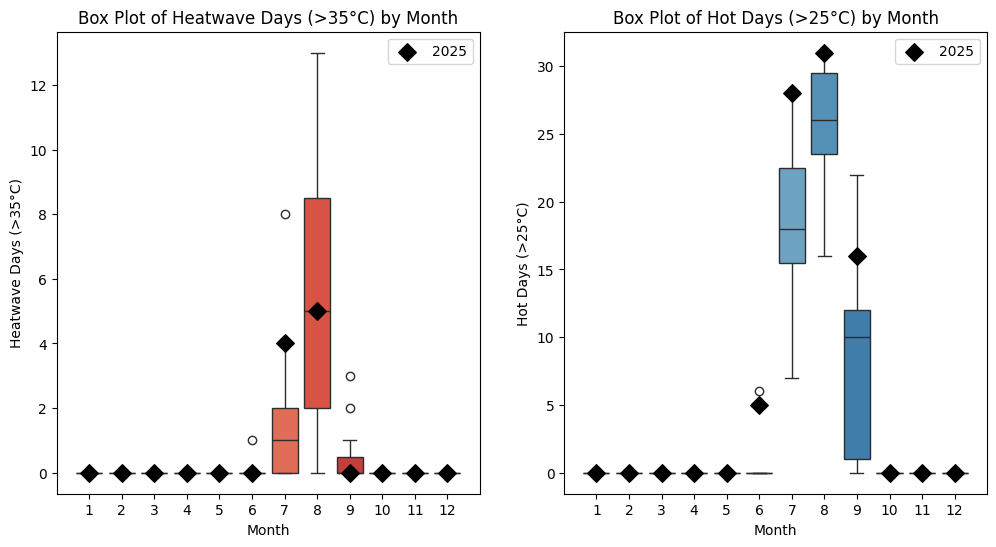

In [22]:
# Box Plot of Extreme Temperature Days by Month
plt.figure(figsize=(12, 6))

extreme_2025 = extreme_days[extreme_days['YearMonth'].str.startswith('2025')]

# Heatwave Days (>35°C)
plt.subplot(1, 2, 1)
sns.boxplot(x='Month', y='Heatwave Days (>35°C)', data=extreme_days, palette='Reds')
plt.scatter(extreme_2025['Month'] - 1, extreme_2025['Heatwave Days (>35°C)'], 
            marker='D', color='black', s=80, label='2025', zorder=10)
plt.title('Box Plot of Heatwave Days (>35°C) by Month')
plt.legend()

# Hot Days (>25°C)
plt.subplot(1, 2, 2)
sns.boxplot(x='Month', y='Hot Days (>25°C)', data=extreme_days, palette='Blues')
plt.scatter(extreme_2025['Month']-1, extreme_2025['Hot Days (>25°C)'], 
            marker='D', color='black', s=80, label='2025', zorder=10)
plt.title('Box Plot of Hot Days (>25°C) by Month')
plt.legend()

plt.show();


**Acknowledgments**

I used Microsoft Copilot to help refine and proofread the English explanations in this notebook’s Markdown sections.